## Benchmark: Channel Flow 

In [1]:
# imports
import os
import sys
import torch
import pickle
import numpy as np
import matplotlib.pyplot as plt

module_path = os.path.abspath(os.path.join('../src/'))
if module_path not in sys.path:
    sys.path.append(module_path)
    
import torch_cae_multilevel_V4 as net
import torch_cae_skip_connection as net2

In [2]:
# load data
data_path = '../data/npy/channel_flow2.npy'
dataset = net.MultiScaleDynamicsDataSet(data_path, n_levels=4)

### multilevel CAE with progressive refinements

In [3]:
archs = [[1,2,3,4],[1,3,5,7],[1,4,7,10],[1,6,11,16]]
tols = [0.05, 0.03, 0.02, 0.01]
net.train_net(archs=archs, dataset=dataset, max_epoch=4000, batch_size=350, tols=tols, activation=torch.nn.Sequential(), 
              w=0.5, model_path=model_path, result_path=result_path, std=0.01, verbose=2)

*************************************************
Model @Level 0:
Perform deepening & widening, train each architectures ...
losses printing format: local: mse/max/overall, global: mse/max/overall
epoch [1/3000]
[training set] local: 0.0193/0.0599/0.0396, global: 0.0590/0.5495/0.3042
[validation set] local: 0.0194/0.0597/0.0395, global: 0.0590/0.5509/0.3049
epoch [300/3000]:
[training set] local: 0.0066/0.0139/0.0103, global: 0.0304/0.3685/0.1994
[validation set] local: 0.0066/0.0150/0.0108, global: 0.0304/0.3705/0.2004
early stopping at 300th iteration due to satisfying reconstruction!

-------------------------------------------------
*************************************************
*************************************************
Model @Level 1:
Perform deepening & widening, train each architectures ...
losses printing format: local: mse/max/overall, global: mse/max/overall
epoch [1/3000]
[training set] local: 0.0216/0.1720/0.0968, global: 0.0410/0.4650/0.2530
[validation set] loc

epoch [1800/3000]:
[training set] local: 0.0042/0.0118/0.0080, global: 0.0044/0.0521/0.0282
[validation set] local: 0.0041/0.0145/0.0093, global: 0.0043/0.0565/0.0304
epoch [2100/3000]:
[training set] local: 0.0039/0.0116/0.0078, global: 0.0041/0.0510/0.0276
[validation set] local: 0.0039/0.0143/0.0091, global: 0.0041/0.0553/0.0297
epoch [2400/3000]:
[training set] local: 0.0039/0.0116/0.0077, global: 0.0041/0.0516/0.0278
[validation set] local: 0.0039/0.0133/0.0086, global: 0.0040/0.0560/0.0300
epoch [2700/3000]:
[training set] local: 0.0038/0.0120/0.0079, global: 0.0039/0.0463/0.0251
[validation set] local: 0.0038/0.0139/0.0088, global: 0.0039/0.0506/0.0272
epoch [3000/3000]:
[training set] local: 0.0037/0.0113/0.0075, global: 0.0038/0.0467/0.0252
[validation set] local: 0.0036/0.0136/0.0086, global: 0.0037/0.0511/0.0274

-------------------------------------------------
losses printing format: local: mse/max/overall, global: mse/max/overall
epoch [1/3000]
[training set] local: 0.003

epoch [300/3000]:
[training set] local: 0.0026/0.0095/0.0060, global: 0.0026/0.0095/0.0060
[validation set] local: 0.0025/0.0112/0.0069, global: 0.0025/0.0112/0.0069
epoch [600/3000]:
[training set] local: 0.0026/0.0095/0.0060, global: 0.0026/0.0095/0.0060
[validation set] local: 0.0026/0.0112/0.0069, global: 0.0026/0.0112/0.0069
epoch [900/3000]:
[training set] local: 0.0024/0.0090/0.0057, global: 0.0024/0.0090/0.0057
[validation set] local: 0.0024/0.0114/0.0069, global: 0.0024/0.0114/0.0069
epoch [1200/3000]:
[training set] local: 0.0024/0.0084/0.0054, global: 0.0024/0.0084/0.0054
[validation set] local: 0.0024/0.0101/0.0062, global: 0.0024/0.0101/0.0062
epoch [1500/3000]:
[training set] local: 0.0024/0.0086/0.0055, global: 0.0024/0.0086/0.0055
[validation set] local: 0.0024/0.0097/0.0061, global: 0.0024/0.0097/0.0061
epoch [1800/3000]:
[training set] local: 0.0024/0.0080/0.0052, global: 0.0024/0.0080/0.0052
[validation set] local: 0.0024/0.0103/0.0063, global: 0.0024/0.0103/0.0063
e

In [ ]:
# result_path = '../result/fluid2'
# results_1 = {}
# for file_name in sorted(os.listdir(result_path)):
#     if file_name.endswith('.dat'):
#         key, _ = file_name.split('.')
#         with open(os.path.join(result_path, file_name), 'rb') as f: 
#             records[key]= pickle.load(f)

### multilevel CAE with nonlinear activation functions (without progressive refinements)

In [4]:
arch = results_1['arch']
results_2 = net.train_net(arch=arch, dataset=dataset, max_epoch=3000, batch_size=350, tols=None,
                       activation=torch.nn.ReLU(),  w=0.5, std=0.01)

*************************************************
Model @Level 0:
Perform deepening & widening, train each architectures ...
losses printing format: local: mse/max/overall, global: mse/max/overall
epoch [1/3000]
[training set] local: 0.0156/0.0534/0.0345, global: 0.0535/0.5302/0.2919
[validation set] local: 0.0156/0.0561/0.0359, global: 0.0535/0.5308/0.2921
epoch [300/3000]:
[training set] local: 0.0065/0.0139/0.0102, global: 0.0305/0.3698/0.2002
[validation set] local: 0.0065/0.0152/0.0108, global: 0.0305/0.3716/0.2011
epoch [600/3000]:
[training set] local: 0.0064/0.0136/0.0100, global: 0.0303/0.3673/0.1988
[validation set] local: 0.0064/0.0149/0.0106, global: 0.0303/0.3685/0.1994
epoch [900/3000]:
[training set] local: 0.0063/0.0131/0.0097, global: 0.0301/0.3656/0.1978
[validation set] local: 0.0063/0.0143/0.0103, global: 0.0300/0.3662/0.1981
epoch [1200/3000]:
[training set] local: 0.0062/0.0127/0.0095, global: 0.0298/0.3641/0.1969
[validation set] local: 0.0062/0.0137/0.0100, glob

epoch [600/3000]:
[training set] local: 0.0070/0.0258/0.0164, global: 0.0073/0.0803/0.0438
[validation set] local: 0.0070/0.0297/0.0183, global: 0.0073/0.0800/0.0436
epoch [900/3000]:
[training set] local: 0.0071/0.0266/0.0169, global: 0.0074/0.0851/0.0463
[validation set] local: 0.0071/0.0274/0.0173, global: 0.0074/0.0850/0.0462
epoch [1200/3000]:
[training set] local: 0.0072/0.0257/0.0164, global: 0.0074/0.0846/0.0460
[validation set] local: 0.0071/0.0285/0.0178, global: 0.0074/0.0844/0.0459
epoch [1500/3000]:
[training set] local: 0.0071/0.0253/0.0162, global: 0.0072/0.0800/0.0436
[validation set] local: 0.0071/0.0280/0.0175, global: 0.0072/0.0797/0.0434
epoch [1800/3000]:
[training set] local: 0.0068/0.0260/0.0164, global: 0.0070/0.0819/0.0444
[validation set] local: 0.0068/0.0288/0.0178, global: 0.0070/0.0819/0.0444
epoch [2100/3000]:
[training set] local: 0.0069/0.0253/0.0161, global: 0.0071/0.0796/0.0433
[validation set] local: 0.0069/0.0263/0.0166, global: 0.0070/0.0797/0.0434


epoch [1200/3000]:
[training set] local: 0.0033/0.0155/0.0094, global: 0.0033/0.0155/0.0094
[validation set] local: 0.0033/0.0170/0.0101, global: 0.0033/0.0170/0.0101
epoch [1500/3000]:
[training set] local: 0.0035/0.0149/0.0092, global: 0.0035/0.0149/0.0092
[validation set] local: 0.0035/0.0169/0.0102, global: 0.0035/0.0169/0.0102
epoch [1800/3000]:
[training set] local: 0.0035/0.0146/0.0090, global: 0.0035/0.0146/0.0090
[validation set] local: 0.0035/0.0160/0.0098, global: 0.0035/0.0160/0.0098
epoch [2100/3000]:
[training set] local: 0.0033/0.0146/0.0089, global: 0.0033/0.0146/0.0089
[validation set] local: 0.0033/0.0158/0.0096, global: 0.0033/0.0158/0.0096
epoch [2400/3000]:
[training set] local: 0.0034/0.0145/0.0090, global: 0.0034/0.0145/0.0090
[validation set] local: 0.0034/0.0156/0.0095, global: 0.0034/0.0156/0.0095
epoch [2700/3000]:
[training set] local: 0.0033/0.0140/0.0087, global: 0.0033/0.0140/0.0087
[validation set] local: 0.0033/0.0153/0.0093, global: 0.0033/0.0153/0.009

### CAE with symmetric skipped connections & nonlinear activations

In [5]:
arch = results_1['arch']
n_params_3, errs_3 = net2.train_archs(arch=arch, activation=torch.nn.ReLU(), dataset=dataset, 
                                      base_epoch=3000, batch_size=350, w=0.5, std=0.01)

epoch [300/3000]:
[training set] local: 0.3576/0.5085/0.4331, global: 0.3189/0.5149/0.4169
[validation set] local: 0.3573/0.5095/0.4334, global: 0.3188/0.5217/0.4202
epoch [600/3000]:
[training set] local: 0.2223/0.3408/0.2816, global: 0.1992/0.3460/0.2726
[validation set] local: 0.2221/0.3416/0.2819, global: 0.1991/0.3515/0.2753
epoch [900/3000]:
[training set] local: 0.1311/0.2211/0.1761, global: 0.1216/0.2251/0.1733
[validation set] local: 0.1309/0.2217/0.1763, global: 0.1215/0.2296/0.1756
epoch [1200/3000]:
[training set] local: 0.0734/0.1389/0.1062, global: 0.0756/0.2067/0.1412
[validation set] local: 0.0733/0.1393/0.1063, global: 0.0756/0.2067/0.1412
epoch [1500/3000]:
[training set] local: 0.0399/0.0849/0.0624, global: 0.0519/0.2877/0.1698
[validation set] local: 0.0398/0.0852/0.0625, global: 0.0519/0.2877/0.1698
epoch [1800/3000]:
[training set] local: 0.0226/0.0511/0.0368, global: 0.0425/0.3629/0.2027
[validation set] local: 0.0226/0.0513/0.0369, global: 0.0425/0.3629/0.2027
e

epoch [7200/18000]:
[training set] local: 0.0019/0.0070/0.0045, global: 0.0024/0.0431/0.0228
[validation set] local: 0.0019/0.0096/0.0057, global: 0.0024/0.0420/0.0222
epoch [9000/18000]:
[training set] local: 0.0018/0.0066/0.0042, global: 0.0023/0.0436/0.0230
[validation set] local: 0.0018/0.0086/0.0052, global: 0.0023/0.0411/0.0217
epoch [10800/18000]:
[training set] local: 0.0017/0.0064/0.0041, global: 0.0023/0.0427/0.0225
[validation set] local: 0.0017/0.0077/0.0047, global: 0.0022/0.0403/0.0213
epoch [12600/18000]:
[training set] local: 0.0017/0.0063/0.0040, global: 0.0022/0.0435/0.0229
[validation set] local: 0.0017/0.0079/0.0048, global: 0.0022/0.0411/0.0216
epoch [14400/18000]:
[training set] local: 0.0016/0.0060/0.0038, global: 0.0022/0.0431/0.0226
[validation set] local: 0.0016/0.0081/0.0049, global: 0.0022/0.0409/0.0216
epoch [16200/18000]:
[training set] local: 0.0016/0.0058/0.0037, global: 0.0021/0.0415/0.0218
[validation set] local: 0.0016/0.0075/0.0046, global: 0.0021/0.

epoch [16500/33000]:
[training set] local: 0.0206/0.0718/0.0462, global: 0.0206/0.0718/0.0462
[validation set] local: 0.0206/0.0774/0.0490, global: 0.0206/0.0774/0.0490
epoch [19800/33000]:
[training set] local: 0.0203/0.0711/0.0457, global: 0.0203/0.0711/0.0457
[validation set] local: 0.0204/0.0774/0.0489, global: 0.0204/0.0774/0.0489
epoch [23100/33000]:
[training set] local: 0.0202/0.0726/0.0464, global: 0.0202/0.0726/0.0464
[validation set] local: 0.0202/0.0756/0.0479, global: 0.0202/0.0756/0.0479
epoch [26400/33000]:
[training set] local: 0.0202/0.0723/0.0462, global: 0.0202/0.0723/0.0462
[validation set] local: 0.0202/0.0757/0.0479, global: 0.0202/0.0757/0.0479
early stopping at 26400th iteration due to slow convergence!
-------------------------------------------------
epoch [3600/36000]:
[training set] local: 0.0011/0.0054/0.0032, global: 0.0011/0.0054/0.0032
[validation set] local: 0.0011/0.0068/0.0040, global: 0.0011/0.0068/0.0040
epoch [7200/36000]:
[training set] local: 0.0

### Linear CAE with symmetric skipped connections

In [6]:
arch = results_1['arch']
n_params_4, errs_4 = net2.train_archs(arch=arch, activation=torch.nn.Sequential(), dataset=dataset, 
                                      base_epoch=3000, batch_size=350, w=0.5, std=0.01)

epoch [300/3000]:
[training set] local: 0.0657/0.2329/0.1493, global: 0.0503/0.2374/0.1439
[validation set] local: 0.0657/0.2314/0.1486, global: 0.0504/0.2371/0.1437
epoch [600/3000]:
[training set] local: 0.0282/0.0599/0.0441, global: 0.0261/0.2382/0.1322
[validation set] local: 0.0282/0.0638/0.0460, global: 0.0261/0.2449/0.1355
epoch [900/3000]:
[training set] local: 0.0222/0.0551/0.0387, global: 0.0249/0.2431/0.1340
[validation set] local: 0.0222/0.0572/0.0397, global: 0.0249/0.2499/0.1374
epoch [1200/3000]:
[training set] local: 0.0191/0.0521/0.0356, global: 0.0245/0.2410/0.1327
[validation set] local: 0.0191/0.0545/0.0368, global: 0.0245/0.2478/0.1361
epoch [1500/3000]:
[training set] local: 0.0176/0.0494/0.0335, global: 0.0251/0.2521/0.1386
[validation set] local: 0.0176/0.0513/0.0345, global: 0.0251/0.2572/0.1411
epoch [1800/3000]:
[training set] local: 0.0158/0.0465/0.0312, global: 0.0248/0.2586/0.1417
[validation set] local: 0.0158/0.0487/0.0322, global: 0.0248/0.2585/0.1417
e

epoch [12600/18000]:
[training set] local: 0.0017/0.0064/0.0041, global: 0.0022/0.0400/0.0211
[validation set] local: 0.0016/0.0085/0.0050, global: 0.0022/0.0407/0.0214
epoch [14400/18000]:
[training set] local: 0.0016/0.0065/0.0041, global: 0.0021/0.0366/0.0193
[validation set] local: 0.0016/0.0076/0.0046, global: 0.0021/0.0366/0.0194
epoch [16200/18000]:
[training set] local: 0.0016/0.0063/0.0040, global: 0.0022/0.0397/0.0209
[validation set] local: 0.0016/0.0085/0.0051, global: 0.0022/0.0396/0.0209
epoch [18000/18000]:
[training set] local: 0.0014/0.0055/0.0034, global: 0.0020/0.0380/0.0200
[validation set] local: 0.0014/0.0070/0.0042, global: 0.0019/0.0371/0.0195
-------------------------------------------------
epoch [2100/21000]:
[training set] local: 0.0027/0.0092/0.0059, global: 0.0033/0.0472/0.0252
[validation set] local: 0.0027/0.0106/0.0066, global: 0.0033/0.0479/0.0256
epoch [4200/21000]:
[training set] local: 0.0018/0.0070/0.0044, global: 0.0024/0.0438/0.0231
[validation s

epoch [23100/33000]:
[training set] local: 0.0005/0.0023/0.0014, global: 0.0005/0.0023/0.0014
[validation set] local: 0.0005/0.0025/0.0015, global: 0.0005/0.0025/0.0015
epoch [26400/33000]:
[training set] local: 0.0004/0.0016/0.0010, global: 0.0004/0.0016/0.0010
[validation set] local: 0.0004/0.0023/0.0013, global: 0.0004/0.0023/0.0013
epoch [29700/33000]:
[training set] local: 0.0004/0.0017/0.0011, global: 0.0004/0.0017/0.0011
[validation set] local: 0.0004/0.0022/0.0013, global: 0.0004/0.0022/0.0013
epoch [33000/33000]:
[training set] local: 0.0003/0.0013/0.0008, global: 0.0003/0.0013/0.0008
[validation set] local: 0.0003/0.0019/0.0011, global: 0.0003/0.0019/0.0011
-------------------------------------------------
epoch [3600/36000]:
[training set] local: 0.0010/0.0054/0.0032, global: 0.0010/0.0054/0.0032
[validation set] local: 0.0010/0.0069/0.0039, global: 0.0010/0.0069/0.0039
epoch [7200/36000]:
[training set] local: 0.0009/0.0047/0.0028, global: 0.0009/0.0047/0.0028
[validation s

### err - # of params 

Text(0,0.5,'log(validation error)')

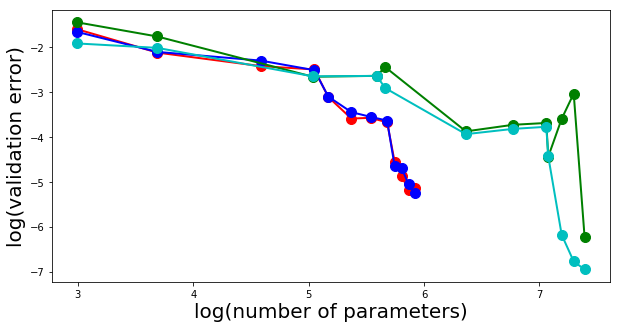

In [7]:
plt.figure(figsize=(10, 5))
plt.plot(np.log(results_1['n_params']), np.log(results_1['best_val_errs']), 'r-o', markersize=10, linewidth=2.0)
plt.plot(np.log(results_2['n_params']), np.log(results_2['best_val_errs']), 'b-o', markersize=10, linewidth=2.0)
plt.plot(np.log(n_params_3), np.log(errs_3), 'g-o', markersize=10, linewidth=2.0)
plt.plot(np.log(n_params_4), np.log(errs_4), 'c-o', markersize=10, linewidth=2.0)
plt.xlabel('log(number of parameters)', fontsize=20)
plt.ylabel('log(validation error)', fontsize=20)

### err - # of encodings

In [8]:
# compute the size of encodings 
arch_diff = list()
for l in arch:
    arch_diff.append([1] + [l[i] - l[i-1] for i in range(1, len(l))])

size_of_maps = list()
for i in range(len(arch)):
    size_of_maps.append([np.multiply(*results_1['model'].resolved_maps[str(i)]['0'].size())])
    for j in range(len(results_1['model'].resolved_maps[str(i)]) - 1):
        n1 = int(torch.sum(1 - results_1['model'].resolved_maps[str(i)][str(j)]))
        size_of_maps[i].append(n1)

n_encodings_1 = [0]
n_encodings_234 = [0]
for i in range(len(arch_diff)):
    n_encodings_1.append(n_encodings_1[-1] + size_of_maps[i][0])
    n_encodings_234.append(n_encodings_234[-1] + size_of_maps[i][0])
    for j in range(1, len(arch_diff[i])):
        # add_size = min(size_of_maps[i][j]*(2+arch_diff[i][j]), size_of_maps[i][0]*arch_diff[i][j])
        add_size = size_of_maps[i][j] * arch_diff[i][j]
        n_encodings_1.append(n_encodings_1[-1] + add_size)
        n_encodings_234.append(n_encodings_234[-1] + size_of_maps[i][0]*arch_diff[i][j])

n_encodings_1 = n_encodings_1[1:]
n_encodings_234 = n_encodings_234[1:]

Text(0,0.5,'log(validation error)')

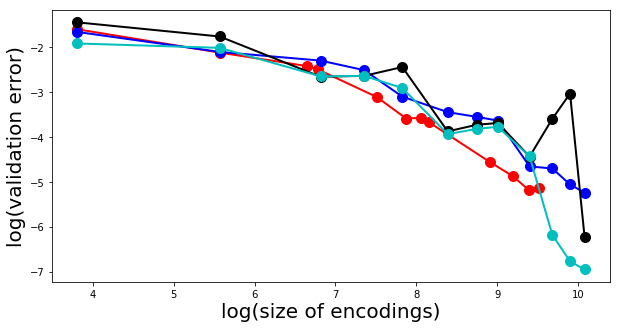

In [9]:
plt.figure(figsize=(10, 5))
plt.plot(np.log(n_encodings_1), np.log(results_1['best_val_errs']), 'r-o', markersize=10, linewidth=2.0)
plt.plot(np.log(n_encodings_234), np.log(results_2['best_val_errs']), 'b-o', markersize=10, linewidth=2.0)
plt.plot(np.log(n_encodings_234), np.log(errs_3), 'k-o', markersize=10, linewidth=2.0)
plt.plot(np.log(n_encodings_234), np.log(errs_4), 'c-o', markersize=10, linewidth=2.0)
plt.xlabel('log(size of encodings)', fontsize=20)
plt.ylabel('log(validation error)', fontsize=20)

In [10]:
import pickle
result_path = '../result/fluid2/'

with open(os.path.join(result_path, 'errs_1.dat'), "wb") as fp: 
    pickle.dump(results_1['best_val_errs'], fp)
with open(os.path.join(result_path, 'errs_2.dat'), "wb") as fp: 
    pickle.dump(results_2['best_val_errs'], fp)
with open(os.path.join(result_path, 'errs_3.dat'), "wb") as fp: 
    pickle.dump(errs_3, fp)
with open(os.path.join(result_path, 'errs_4.dat'), "wb") as fp: 
    pickle.dump(errs_4, fp)
    
with open(os.path.join(result_path, 'n_params_1.dat'), "wb") as fp: 
    pickle.dump(results_1['n_params'], fp)
with open(os.path.join(result_path, 'n_params_2.dat'), "wb") as fp: 
    pickle.dump(results_2['n_params'], fp)
with open(os.path.join(result_path, 'n_params_3.dat'), "wb") as fp: 
    pickle.dump(n_params_3, fp)
with open(os.path.join(result_path, 'n_params_4.dat'), "wb") as fp: 
    pickle.dump(n_params_4, fp)
    
with open(os.path.join(result_path, 'encodings_1.dat'), "wb") as fp: 
    pickle.dump(n_encodings_1, fp)
with open(os.path.join(result_path, 'encodings_234.dat'), "wb") as fp: 
    pickle.dump(n_encodings_234, fp)